In [ ]:
import cv2 as cv
import os
import sys
import numpy as np
from matplotlib import pyplot as plt
from google.colab import drive
from google.colab.patches import cv_imshow
drive.mount('/content/drive')

Mounted at /content/drive


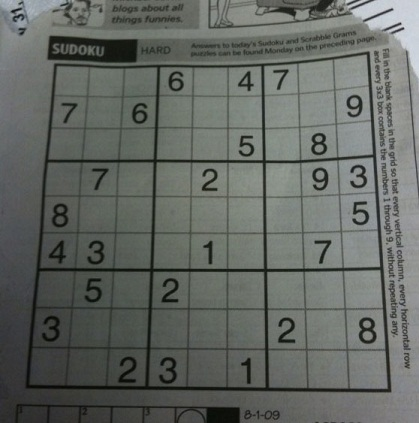

In [ ]:
folder = r'/content/drive/MyDrive/images'
path_img = os.path.join(folder,'sudoku.jpg')

img = cv.imread(path_img)
if img is None:
  sys.exit("could not read the image.")
cv_imshow(img)
img_gray = cv.cvtColor(img,cv.COLOR_BGR2GRAY)

In [ ]:
def Sobel(image):
  grad_x = cv.Sobel(image,cv.CV_32F,1,0,ksize=3) #計算xx方向的導數（末端的1,0表示xx方向）
  grad_y = cv.Sobel(image,cv.CV_32F,0,1,ksize=3) #計算yy方向的導數（0,1，結尾表示yy方向）
  grad_xy = abs(grad_x)+ abs(grad_y)
  sobel = np.uint8(np.clip(grad_xy,0,255)) #將絕對值圖像轉換為8位元
  return sobel, grad_x, grad_y

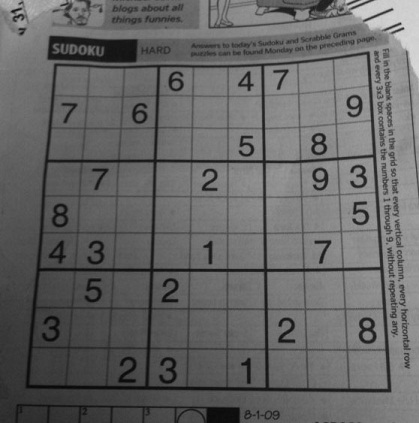

In [ ]:
img_sobel,grad_x,grad_y = Sobel(img_gray)
cv_imshow(img_gray)

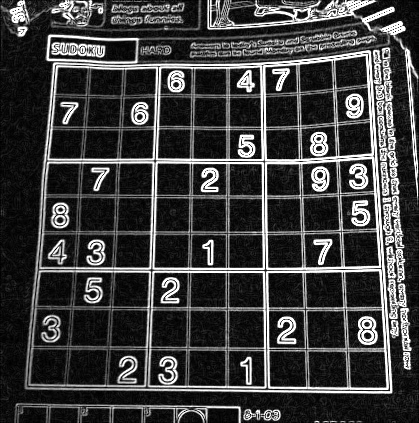

In [ ]:
cv_imshow(img_sobel)

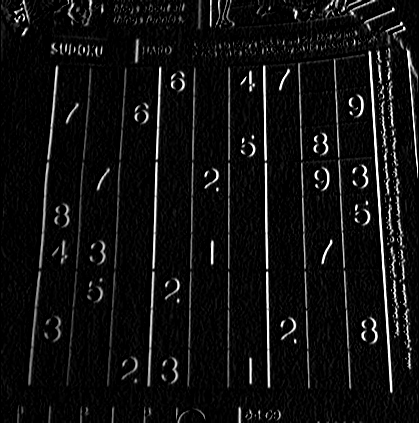

In [ ]:
cv_imshow(grad_x)

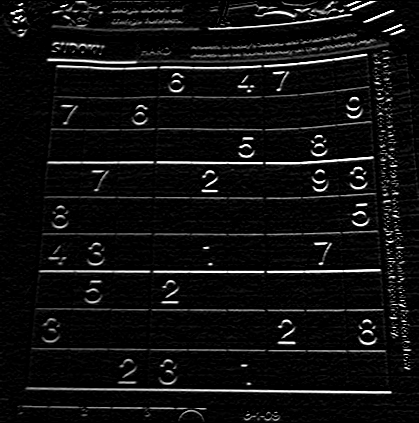

In [ ]:
cv_imshow(grad_y)

In [ ]:
def Laplacian(image):
  laplacian = cv.Laplacian(image,cv.CV_8U,ksize=3) #使用 cv2.CV_8U 型態做梯度運算
  # cv2.Laplacian(img, ddepth, ksize, scale)
  # img 來源影像
  # ddepth 影像深度，設定 -1 表示使用圖片原本影像深度
  # ksize 運算區域大小，預設 1 ( 必須是正奇數 )
  # scale 縮放比例常數，預設 1 ( 必須是正奇數 )
  return laplacian

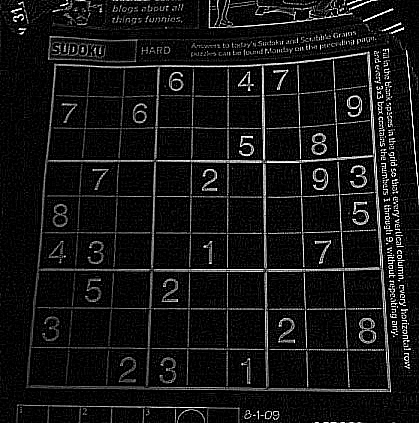

In [ ]:
res = Laplacian(img_gray)
cv_imshow(res)

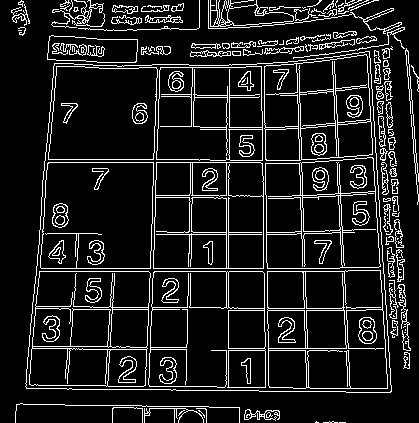

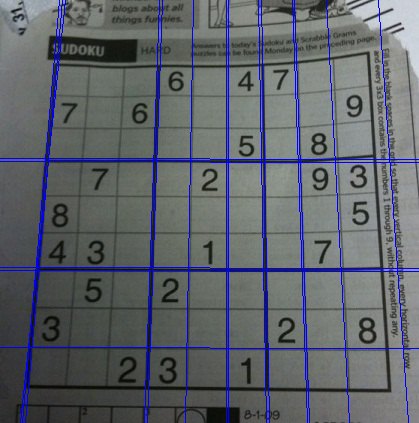

In [ ]:
def Edge_Detection_HoughLine(original_image,image):
  edges = cv.Canny(image,50,200)
  lines = cv.HoughLines(edges, 1, np.pi/180,200)
  if lines is not None:
    for i in range(len(lines)):
      for rho,theta in lines[i]:
        a = np.cos(theta)
        b = np.sin(theta)
        x0 = a*rho
        y0 = b*rho
        x1 = int(x0+1000*(-b))
        y1 = int(y0+1000*(a))
        x2 = int(x0-1000*(-b))
        y2 = int(y0-1000*(a))
        after_HoughLines = cv.line(original_image,(x1,y1),(x2,y2),(255,0,0),1)
  return edges, after_HoughLines

edges,img_line = Edge_Detection_HoughLine(img,img_gray)
cv_imshow(edges)
cv_imshow(img_line)


